In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_df = pd.read_csv('netflix.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


***Observation***:

*   All the columns except 'release_year' are sting data type
*   There are good amount of null vlaues in the columns: Directors, Cast, and Country

There are totally 8807 rows in the Data Set, but Directors, cast, and country have values in 6173, 7982, 7976 respectively. The remaining values are filled with Nulls (NaN).

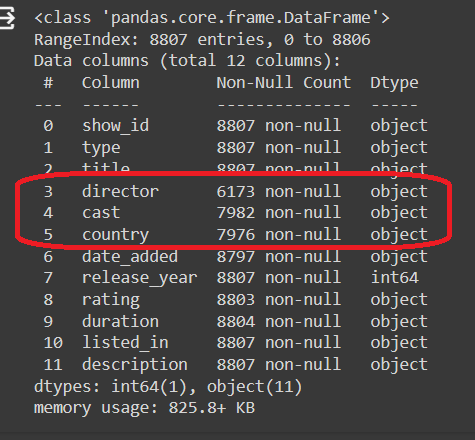






In [ ]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

***Observation***:
1. Director Column has 2634 null entries
2. Cast column has 825 null entries
3. Country column has 831 entries

In [ ]:
#Shape of the Data:
netflix_df.shape

(8807, 12)

In [ ]:
netflix_df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [ ]:
netflix_df[netflix_df['country'].isin(['India'])]
#this is just to check if isin helps in finding all the records with a country name.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [ ]:
netflix_df.country.isna().sum()

831

In [ ]:
netflix_df["country"].fillna("Unknown Country", inplace = True)
netflix_df["director"].fillna("Unknown Director", inplace = True)
netflix_df["cast"].fillna("Unknown Actor", inplace = True)
netflix_df["rating"].fillna("NR", inplace = True)


In [ ]:
netflix_df.country.isna().sum()

0

In [ ]:
pd.DataFrame(netflix_df.country.str.split(',')).head(100)

,country
0,[United States]
1,[South Africa]
2,[Unknown Country]
3,[Unknown Country]
4,[India]
...,...
95,"[United States, United Kingdom]"
96,[United States]
97,[United States]
98,[United Kingdom]


In [ ]:
converted_df = pd.DataFrame(netflix_df['listed_in']).stack()
converted_df

0     listed_in                                        Documentaries
1     listed_in      International TV Shows, TV Dramas, TV Mysteries
2     listed_in    Crime TV Shows, International TV Shows, TV Act...
3     listed_in                               Docuseries, Reality TV
4     listed_in    International TV Shows, Romantic TV Shows, TV ...
                                         ...                        
8802  listed_in                       Cult Movies, Dramas, Thrillers
8803  listed_in               Kids' TV, Korean TV Shows, TV Comedies
8804  listed_in                              Comedies, Horror Movies
8805  listed_in                   Children & Family Movies, Comedies
8806  listed_in       Dramas, International Movies, Music & Musicals
Length: 8807, dtype: object

In [ ]:
#Creating a Function to split the data using comma(,)
def custom_split(text):
    new_text = [txt.strip() for txt in text.split(",")]
    return new_text

#populating the Genre List
genre_list = netflix_df["listed_in"].apply(custom_split).tolist()
genre_df = pd.DataFrame(genre_list,index = netflix_df['title']).stack().reset_index()
genre_df.drop(['level_1'],axis = 1, inplace = True)
genre_df.rename(columns = {0:'Genre'}, inplace = True)
genre_df


,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
#Not Needed.
Genre = netflix_df['director'].apply(lambda x:str(x).split(',')).tolist()
Genre
df_new1 = pd.DataFrame(Genre, index = netflix_df['title'])
df_new1

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Unknown Director,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Unknown Director,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,Unknown Director,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,Unknown Director,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#unnesting the directors column, i.e- creating separate lines for each director in a movie
constraint1=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=netflix_df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown Director
4,Kota Factory,Unknown Director


In [ ]:
#Country_list
country_list = netflix_df["country"].apply(custom_split).tolist()
country_df = pd.DataFrame(country_list,index = netflix_df['title']).stack().reset_index()
country_df.drop(['level_1'],axis = 1, inplace = True)
country_df.rename(columns = {0:'Country'}, inplace = True)
country_df



,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown Country
3,Jailbirds New Orleans,Unknown Country
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,Unknown Country
10847,Zombieland,United States
10848,Zoom,United States


In [ ]:
country_df['Country'].nunique()

124

In [ ]:
#Cast_list
cast_list = netflix_df["cast"].apply(custom_split).tolist()
cast_df = pd.DataFrame(cast_list,index = netflix_df['title']).stack().reset_index()
cast_df.drop(['level_1'],axis = 1, inplace = True)
cast_df.rename(columns = {0:'Actor'}, inplace = True)
cast_df


,title,Actor
0,Dick Johnson Is Dead,Unknown Actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
#Director_list
director_list = netflix_df["director"].apply(custom_split).tolist()
director_df = pd.DataFrame(director_list,index = netflix_df['title']).stack().reset_index()
director_df.drop(['level_1'],axis = 1, inplace = True)
director_df.rename(columns = {0:'Director'}, inplace = True)
director_df


,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown Director
4,Kota Factory,Unknown Director
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Unknown Director
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
ott_df = pd.DataFrame(pd.merge(pd.merge(pd.merge(director_df,cast_df),country_df), genre_df))
ott_df

,title,Director,Actor,Country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
ott_df = netflix_df[['show_id','type','title','date_added','release_year','rating','duration']].merge(ott_df,how = 'left')

In [ ]:
ott_df.isna().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating            0
duration          3
director          0
actor             0
country           0
Genre             0
dtype: int64

In [ ]:
ott_df[ott_df['duration'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,director,actor,country,Genre
126582,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,Louis C.K.,Louis C.K.,United States,Movies
131648,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Louis C.K.,Louis C.K.,United States,Movies
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,Louis C.K.,Louis C.K.,United States,Movies


In [ ]:
#checking to see if duration is null and replacing it with rating value where the duration is misplaced in rating column
ott_df['duration'] = np.where((ott_df['duration'].isna() & ott_df['rating'].str.contains('min')),ott_df['rating'],ott_df.duration)

In [ ]:
ott_df['rating'][ott_df['rating'].str.contains('min')] = 'NR'

<ipython-input-315-f41d125d4502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_df['rating'][ott_df['rating'].str.contains('min')] = 'NR'


In [ ]:
ott_df[ott_df['rating'].str.contains('min')]

,show_id,type,title,date_added,release_year,rating,duration,director,actor,country,Genre


In [ ]:
ott_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
Director        0
Actor           0
Country         0
Genre           0
dtype: int64

In [ ]:
#appraoch 1 --> to update the date to today's date.
#ott_df['date_added'] = pd.to_datetime(ott_df.date_added)

In [ ]:
#appraoch 2
ott_df.dropna(subset=["date_added"], inplace=True)

In [ ]:
ott_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201907 entries, 0 to 202064
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201907 non-null  object
 1   type          201907 non-null  object
 2   title         201907 non-null  object
 3   date_added    201907 non-null  object
 4   release_year  201907 non-null  int64 
 5   rating        201907 non-null  object
 6   duration      201907 non-null  object
 7   director      201907 non-null  object
 8   actor         201907 non-null  object
 9   country       201907 non-null  object
 10  Genre         201907 non-null  object
dtypes: int64(1), object(10)
memory usage: 18.5+ MB


In [ ]:
#Checking how mean/mode/median provides the data based on release year.
for yr in ott_df[ott_df['date_added'].isnull()]['release_year'].unique():
  yr_mean = ott_df[ott_df['release_year'] == yr]['date_added'].mode()
  print(f"{yr}: --> median: {yr_mean}")

2013: --> median: 0   2019-04-09
Name: date_added, dtype: datetime64[ns]
2018: --> median: 0   2018-11-30
Name: date_added, dtype: datetime64[ns]
2003: --> median: 0   2021-09-01
Name: date_added, dtype: datetime64[ns]
2008: --> median: 0   2019-07-01
Name: date_added, dtype: datetime64[ns]
2010: --> median: 0   2018-09-16
1   2021-07-01
Name: date_added, dtype: datetime64[ns]
2012: --> median: 0   2017-08-01
Name: date_added, dtype: datetime64[ns]
2016: --> median: 0   2016-07-15
Name: date_added, dtype: datetime64[ns]
2015: --> median: 0   2016-07-01
Name: date_added, dtype: datetime64[ns]


In [ ]:
#checking the data to see if the mode value resulted in the previous sectoin is correct or not.
yr = 2013
ott_df[ott_df['release_year'] == yr]

,show_id,type,title,date_added,release_year,rating,duration,director,actor,country,Genre
685,s29,Movie,Dark Skies,"September 19, 2021",2013,PG-13,97 min,Scott Stewart,Keri Russell,United States,Horror Movies
686,s29,Movie,Dark Skies,"September 19, 2021",2013,PG-13,97 min,Scott Stewart,Keri Russell,United States,Sci-Fi & Fantasy
687,s29,Movie,Dark Skies,"September 19, 2021",2013,PG-13,97 min,Scott Stewart,Josh Hamilton,United States,Horror Movies
688,s29,Movie,Dark Skies,"September 19, 2021",2013,PG-13,97 min,Scott Stewart,Josh Hamilton,United States,Sci-Fi & Fantasy
689,s29,Movie,Dark Skies,"September 19, 2021",2013,PG-13,97 min,Scott Stewart,J.K. Simmons,United States,Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
201204,s8773,Movie,Yamla Pagla Deewana 2,"May 1, 2017",2013,TV-14,147 min,Sangeeth Sivan,Aidan Cook,India,Comedies
201205,s8773,Movie,Yamla Pagla Deewana 2,"May 1, 2017",2013,TV-14,147 min,Sangeeth Sivan,Aidan Cook,India,International Movies
201206,s8773,Movie,Yamla Pagla Deewana 2,"May 1, 2017",2013,TV-14,147 min,Sangeeth Sivan,Anupam Kher,India,Action & Adventure
201207,s8773,Movie,Yamla Pagla Deewana 2,"May 1, 2017",2013,TV-14,147 min,Sangeeth Sivan,Anupam Kher,India,Comedies


In [ ]:
#Release_Year is the year when the show/movie is released to public,
#however, date_added is the date when the movie/show is added to the Netflix Database.
#hence, I am choosing today's date as the date that is published to Netflix DB.
ott_df.date_added.fillna(pd.to_datetime("today"),inplace = True)

In [ ]:
ott_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
director        0
actor           0
country         0
Genre           0
dtype: int64

In [ ]:
ott_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201907 entries, 0 to 202064
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201907 non-null  object        
 1   type          201907 non-null  object        
 2   title         201907 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  201907 non-null  int64         
 5   rating        201907 non-null  object        
 6   duration      201907 non-null  object        
 7   director      201907 non-null  object        
 8   actor         201907 non-null  object        
 9   Country       201907 non-null  object        
 10  Genre         201907 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


In [ ]:
ott_df

,show_id,type,title,date_added,release_year,rating,duration,director,actor,country,Genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,Unknown Actor,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,International Movies
202061,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
#adding a new column to play around with duration of the shows/movies etc.,
ott_df['duration_copy'] = ott_df['duration']

In [ ]:
ott_df.duration_copy.value_counts()

1 Season     35035
2 Seasons     9485
3 Seasons     5060
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration_copy, Length: 220, dtype: int64

In [ ]:
#tried adding new columns, but we can use group by to get the required information.
ott_df['month_added'] = ott_df['date_added'].dt.month
ott_df['year_added'] = ott_df['date_added'].dt.year

In [ ]:
ott_df[ott_df['month_added'] == 1].count()

show_id          18254
type             18254
title            18254
date_added       18254
release_year     18254
rating           18254
duration         18254
director         18254
actor            18254
country          18254
Genre            18254
duration_copy    18254
month_added      18254
year_added       18254
dtype: int64

In [ ]:
#ott_df.info()
ott_df.date_added = pd.to_datetime(ott_df.date_added)

In [ ]:
ott_df.groupby(by = ott_df.date_added.dt.month).count()

,show_id,type,title,date_added,release_year,rating,duration,Director,Actor,Country,Genre
date_added,,,,,,,,,,,
1,18254,18254,18254,18254,18254,18254,18254,18254,18254,18254,18254
2,13060,13060,13060,13060,13060,13060,13060,13060,13060,13060,13060
3,15859,15859,15859,15859,15859,15859,15859,15859,15859,15859,15859
4,17081,17081,17081,17081,17081,17081,17081,17081,17081,17081,17081
5,13827,13827,13827,13827,13827,13827,13827,13827,13827,13827,13827
6,16659,16659,16659,16659,16659,16659,16659,16659,16659,16659,16659
7,20302,20302,20302,20302,20302,20302,20302,20302,20302,20302,20302
8,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086
9,18120,18120,18120,18120,18120,18120,18120,18120,18120,18120,18120


In [ ]:
ott_df.duration_copy.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
ott_df[ott_df['duration_copy'].str.contains('min')]

,show_id,type,title,date_added,release_year,rating,duration,director,actor,country,Genre,duration_copy,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,Unknown Actor,United States,Documentaries,90 min,9,2021
159,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Robert Cullen,Vanessa Hudgens,Unknown Country,Children & Family Movies,91 min,9,2021
160,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Robert Cullen,Kimiko Glenn,Unknown Country,Children & Family Movies,91 min,9,2021
161,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Robert Cullen,James Marsden,Unknown Country,Children & Family Movies,91 min,9,2021
162,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Robert Cullen,Sofia Carson,Unknown Country,Children & Family Movies,91 min,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,International Movies,111 min,3,2019
202061,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,Music & Musicals,111 min,3,2019
202062,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,Dramas,111 min,3,2019
202063,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,International Movies,111 min,3,2019


In [ ]:
#Replacing the Min and Season values appropriately to perform operations.
ott_df['duration_copy'] = ott_df['duration_copy'].str.replace('min','')
ott_df.loc[ott_df['duration_copy'].str.contains('Season'),'duration_copy']=0

#df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0

In [ ]:
#This is optional code.
ott_df.drop('month_added',axis = 1, inplace = True)
ott_df.drop('year_added',axis = 1, inplace = True)

In [ ]:
#ott_df['duration_copy'] = ott_df.duration_copy.astype(int)
ott_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201907 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        201907 non-null  object        
 1   type           201907 non-null  object        
 2   title          201907 non-null  object        
 3   date_added     201907 non-null  datetime64[ns]
 4   release_year   201907 non-null  int64         
 5   rating         201907 non-null  object        
 6   duration       201907 non-null  object        
 7   director       201907 non-null  object        
 8   actor          201907 non-null  object        
 9   country        201907 non-null  object        
 10  Genre          201907 non-null  object        
 11  duration_copy  201907 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


In [ ]:
ott_df['duration_copy'] = ott_df['duration_copy'].str.replace('min','')
ott_df['duration_copy'] = ott_df[ott_df['duration_copy'].str.contains('Season')].duration_copy.replace('0')

#Not required

In [ ]:
#ott_df.columns
for i in ott_df.columns:
  #print(i, i.title())
  ott_df.rename(columns ={i:i.title()},inplace = True)

ott_df.columns

Index(['Show_Id', 'Type', 'Title', 'Date_Added', 'Release_Year', 'Rating',
       'Duration', 'Director', 'Actor', 'Country', 'Genre'],
      dtype='object')

In [ ]:
ott_df.Country.value_counts()

United States      59266
India              22814
United Kingdom     12938
Unknown Country    11896
Japan               8643
                   ...  
Panama                 2
Mongolia               2
Kazakhstan             1
Nicaragua              1
Uganda                 1
Name: Country, Length: 124, dtype: int64

In [ ]:
ott_df

,Show_Id,Type,Title,Date_Added,Release_Year,Rating,Duration,Director,Actor,Country,Genre,Duration_Copy
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,Unknown Actor,United States,Documentaries,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,International TV Shows,0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Dramas,0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Mysteries,0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Khosi Ngema,South Africa,International TV Shows,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,International Movies,111
202061,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,Music & Musicals,111
202062,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,Dramas,111
202063,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,International Movies,111


In [ ]:
ott_df[ott_df['Type'] == 'Movie']['Duration'].value_counts()

94 min     4343
106 min    4040
97 min     3624
95 min     3560
96 min     3511
           ... 
20 min        4
5 min         3
9 min         2
8 min         2
11 min        2
Name: Duration, Length: 205, dtype: int64

In [ ]:
show_data = pd.DataFrame(ott_df[ott_df['Type'] == 'TV Show'].value_counts()).reset_index()
#show_data.drop('Duration_Copy',axis = 1, inplace = True)
show_data.drop(0,axis = 1, inplace = True)

In [ ]:
show_data

,Show_Id,Type,Title,Date_Added,Release_Year,Rating,Duration,Director,Actor,Country,Genre
0,s100,TV Show,On the Verge,2021-09-07,2021,TV-MA,1 Season,Unknown Director,Alexia Landeau,France,TV Comedies
1,s5170,TV Show,The Irregular at Magic High School,2017-11-15,2014,TV-14,1 Season,Unknown Director,Takuma Terashima,Japan,Anime Series
2,s5170,TV Show,The Irregular at Magic High School,2017-11-15,2014,TV-14,1 Season,Unknown Director,Saki Ogasawara,Japan,International TV Shows
3,s5170,TV Show,The Irregular at Magic High School,2017-11-15,2014,TV-14,1 Season,Unknown Director,Saki Ogasawara,Japan,Teen TV Shows
4,s5170,TV Show,The Irregular at Magic High School,2017-11-15,2014,TV-14,1 Season,Unknown Director,Saori Hayami,Japan,Anime Series
...,...,...,...,...,...,...,...,...,...,...,...
55985,s312,TV Show,Control Z,2021-08-04,2021,TV-MA,2 Seasons,Unknown Director,Marco Zunino,Mexico,Spanish-Language TV Shows
55986,s312,TV Show,Control Z,2021-08-04,2021,TV-MA,2 Seasons,Unknown Director,Marco Zunino,Mexico,TV Dramas
55987,s312,TV Show,Control Z,2021-08-04,2021,TV-MA,2 Seasons,Unknown Director,Mauro Sánchez Navarro,Mexico,International TV Shows
55988,s312,TV Show,Control Z,2021-08-04,2021,TV-MA,2 Seasons,Unknown Director,Mauro Sánchez Navarro,Mexico,Spanish-Language TV Shows


In [ ]:
movie_data = pd.DataFrame(ott_df[ott_df['Type'] == 'Movie'].value_counts()).reset_index()
#movie_data.drop('Duration_Copy',axis = 1, inplace = True)
movie_data.drop(0,axis = 1, inplace = True)

In [ ]:
movie_data

,Show_Id,Type,Title,Date_Added,Release_Year,Rating,Duration,Director,Actor,Country,Genre
0,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113,Miguel Cohan,Paulina Garcia,United States,International Movies
1,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113,Miguel Cohan,Malena Sánchez,Argentina,International Movies
2,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113,Miguel Cohan,Luis Gnecco,Argentina,International Movies
3,s1632,Movie,Rust Creek,2020-11-30,2018,R,108,Jen McGowan,Micah Hauptman,United States,Thrillers
4,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113,Miguel Cohan,Luis Gnecco,United States,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
145857,s393,Movie,Django Unchained,2021-07-24,2012,R,165,Quentin Tarantino,Samuel L. Jackson,United States,Action & Adventure
145858,s393,Movie,Django Unchained,2021-07-24,2012,R,165,Quentin Tarantino,Sammi Rotibi,United States,Dramas
145859,s393,Movie,Django Unchained,2021-07-24,2012,R,165,Quentin Tarantino,Sammi Rotibi,United States,Action & Adventure
145860,s393,Movie,Django Unchained,2021-07-24,2012,R,165,Quentin Tarantino,Nichole Galicia,United States,Dramas


In [ ]:
movie_data['Duration'] = movie_data['Duration'].str.replace('min','')
movie_data['Duration'] = movie_data['Duration'].astype(int)

In [ ]:
movie_data['Duration'] = movie_data['Duration'].astype(int)

ValueError: invalid literal for int() with base 10: '113 min'

In [ ]:
movie_data['Duration'].describe()

count    145862.000000
mean        106.838258
std          24.713840
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: Duration, dtype: float64

<Axes: ylabel='Duration'>

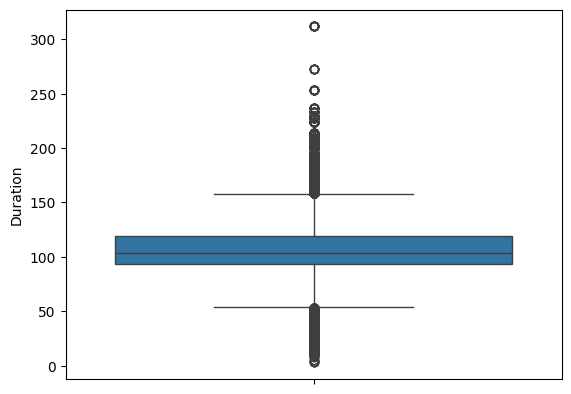

In [ ]:
movie_data['Duration'].value_counts()

#sns.boxplot(x ='day', y ='total_bill', data = df, hue ='smoker')
sns.boxplot(data = movie_data['Duration'])

Non Graphical Analysis, add value counts for each categorical data type. (ott_df)

In [ ]:
#sample
ott_df['Genre'].value_counts()

Dramas                          29806
International Movies            28243
Comedies                        20829
International TV Shows          12837
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4914
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4562
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2295
TV Action & Adventure            2278
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

***Visual Analysis*** - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

In [ ]:
#For graphical analysis:
#eg: : We can use a count plot to get the counts of each category
genre_count = ott_df['Genre'].value_counts().head(10)

In [ ]:
genre_count

Dramas                      29806
International Movies        28243
Comedies                    20829
International TV Shows      12837
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8933
Thrillers                    7107
Romantic Movies              6412
Name: Genre, dtype: int64

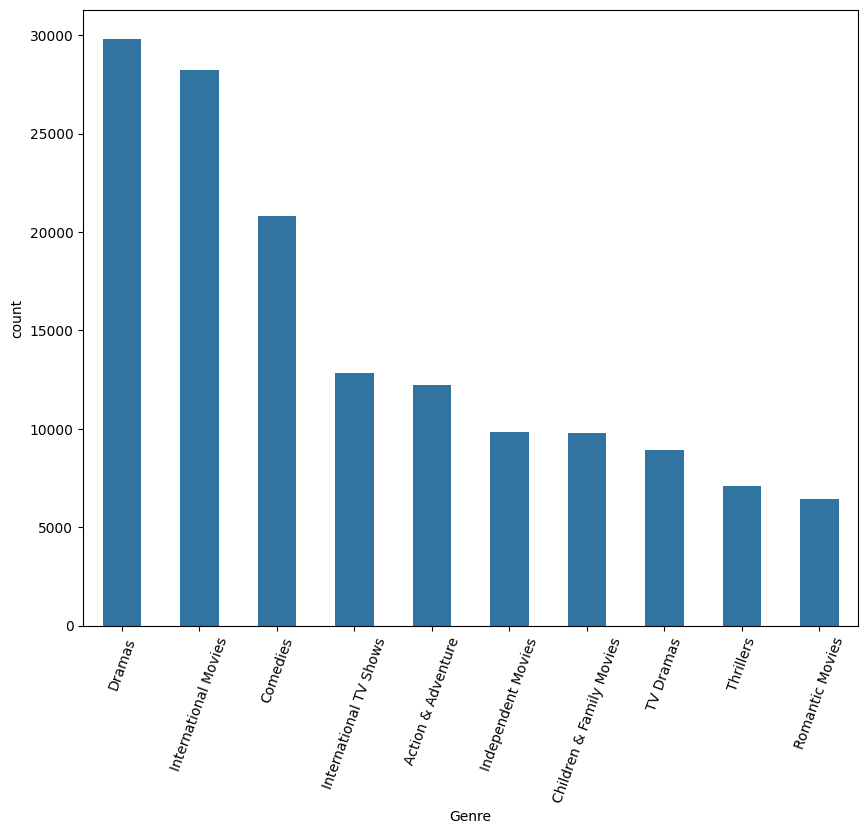

In [ ]:
#x = genre_count.index
plt.figure(figsize = (10,8))
#plt.title("Top X Genres",fontsize = 12)
sns.countplot(data = ott_df,x = 'Genre', order = genre_count.index,width = 0.5)
plt.xticks(rotation = 70)
#plt.title("Your Chart's Title")
plt.show()

Comparison of tv shows vs. movies.

a. Find the number of movies produced in each country and pick the top 10
countries.

Hint : We want you to apply group by each country and find the count of unique titles of movies

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

Hint : We want you to apply group by each country and find the count of unique titles of Tv-shows

In [ ]:
#Grouping the Data by country and selecting the country data.
movie_data[movie_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country']

#Grouping the Data by country and selecting the count based on country.
movie_data[movie_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country'].count()

#sorting the values - by default, the data is sorted in ascending order.
movie_data[movie_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country'].count().sort_values

#sorting the values by descending.
movie_data[movie_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country'].count().sort_values(ascending = False)

#selecting the top 10 records.
movie_data_plt = movie_data[movie_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country'].count().sort_values(ascending = False).head(10)

In [ ]:
movie_data_plt

Country
United States     45792
India             21411
United Kingdom     8580
France             6605
Canada             5738
Japan              3525
Spain              3469
Germany            3427
China              2377
Nigeria            2236
Name: Country, dtype: int64

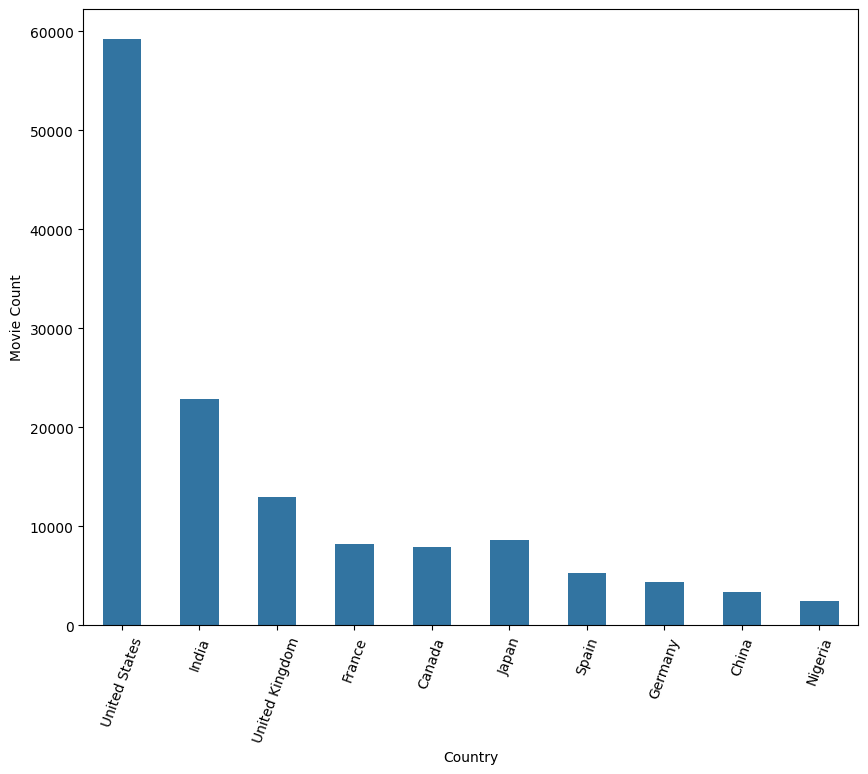

In [ ]:
#Country Name - Category
#Count - Continuous
#Count Plot, Bar Chart/Plot

#x = genre_count.index
plt.figure(figsize = (10,8))
#plt.title("Top X Genres",fontsize = 12)
sns.countplot(data = ott_df,x = 'Country', order = movie_data_plt.index,width = 0.5)
plt.xticks(rotation = 70)
plt.ylabel("Movie Count")
#plt.title("Your Chart's Title")
plt.show()

In [ ]:
ott_df['Country'].nunique()

198

In [ ]:
ott_df['Country'].str.strip().nunique()

124

In [ ]:
show_data_plt = show_data[show_data['Country'] != 'Unknown Country'].groupby(by = 'Country')['Country'].count().sort_values(ascending = False).head(10)
show_data_plt

Country
United States     13449
Japan              5118
United Kingdom     4358
South Korea        3754
Canada             2177
Mexico             2018
Spain              1846
Taiwan             1719
France             1647
India              1403
Name: Country, dtype: int64

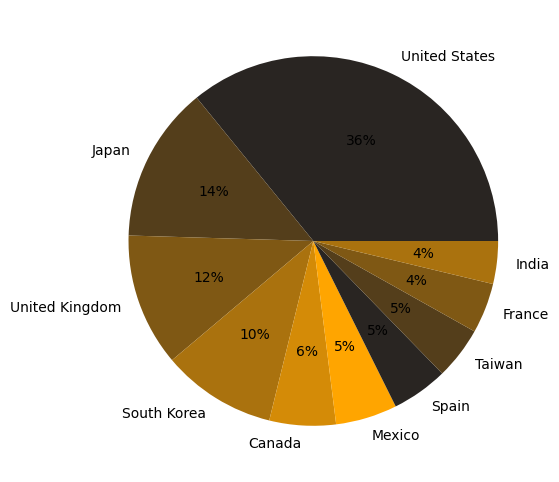

In [ ]:
#x = genre_count.index
plt.figure(figsize = (8,6))
plt.pie(show_data_plt, labels=show_data_plt.index, colors=sns.color_palette('dark:orange'), autopct='%.0f%%')
plt.show()

#plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

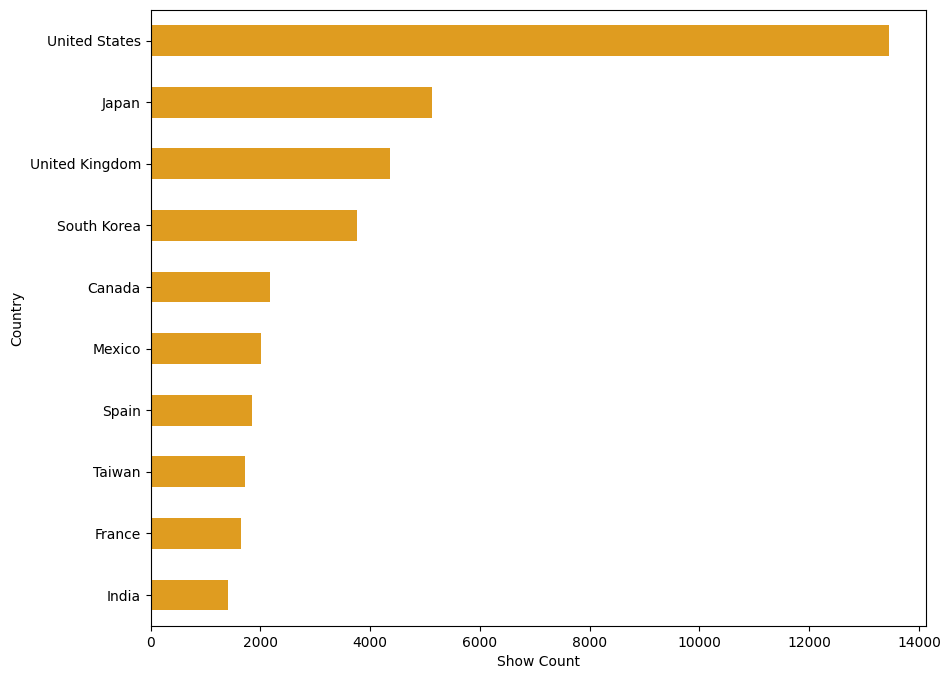

In [ ]:
#x = genre_count.index
plt.figure(figsize = (10,8))
#plt.title("Top X Genres",fontsize = 12)
sns.countplot(data = show_data,y = 'Country', order = show_data_plt.index,width = 0.5, color = 'orange')
plt.xlabel("Show Count")
#plt.title("Your Chart's Title")
plt.show()

Analysis of actors/directors of different types of shows/movies

a. Identify the top 10 actors who have appeared in most movies or TV shows.
Hint : We want you to group by each actor and find the count of unique titles of Tv-shows/movies

b. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each director and find the count of unique titles of Tv-shows/movies

In [ ]:
actor_data = ott_df[ott_df["Actor"] != 'Unknown Actor'].groupby(by = 'Actor')['Actor'].count().sort_values(ascending = False).head(10)
actor_data
#sort_values(['column1', 'column2'], ascending=(False, True))

Actor
Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
Frank Langella      128
Anupam Kher         127
John Rhys-Davies    125
Shah Rukh Khan      108
Naseeruddin Shah    106
Radhika Apte        104
Name: Actor, dtype: int64

In [ ]:
ott_df[ott_df['Actor'] != 'Unknown Actor'].Actor.unique()

array(['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

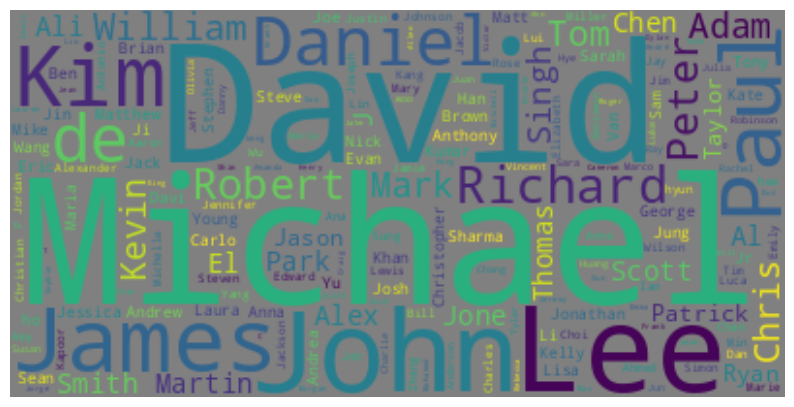

In [ ]:
#Note Needed, just a Demo
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in ott_df[ott_df['Actor'] != 'Unknown Actor'].Actor.unique())

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

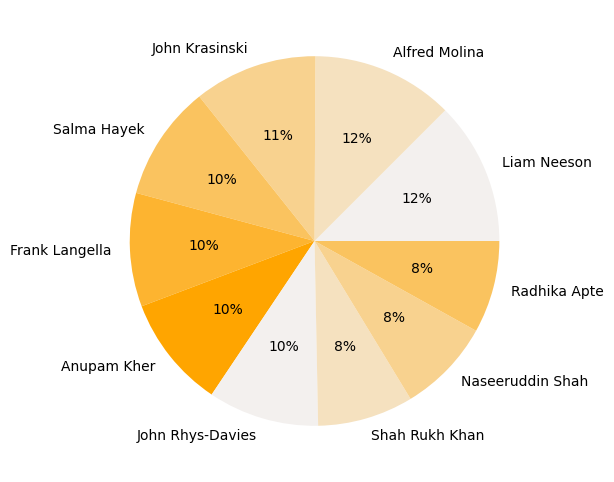

In [ ]:
plt.figure(figsize = (8,6))
plt.pie(actor_data, labels=actor_data.index, colors=sns.color_palette('light:orange'), autopct='%.0f%%')
plt.show()

In [ ]:
Director_data = ott_df[ott_df["Director"] != 'Unknown Director'].groupby(by = 'Director')['Director'].count().sort_values(ascending = False).head(10)
Director_data

Director
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: Director, dtype: int64

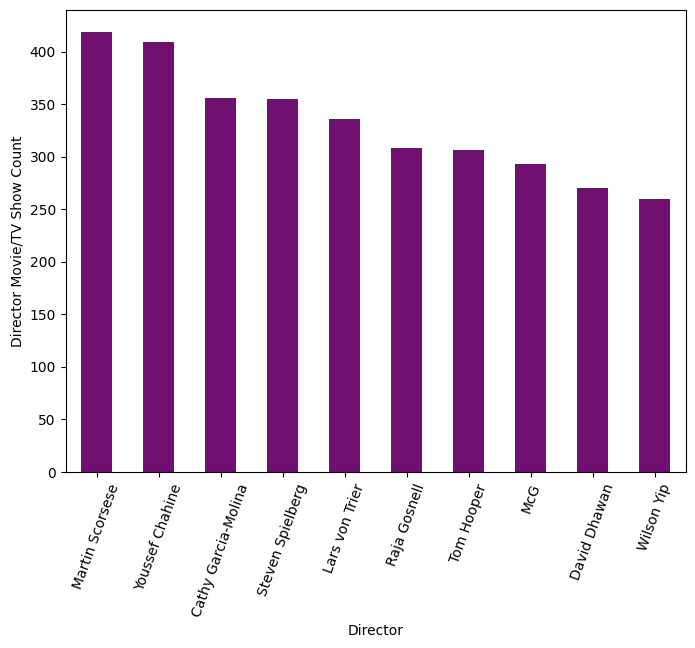

In [ ]:
#x = genre_count.index
plt.figure(figsize = (8,6))
#plt.title("Top X Genres",fontsize = 12)
sns.countplot(data = ott_df,x = 'Director',order = Director_data.index,width = 0.5,color="purple")
#sns.countplot(data = ott_df,x = 'Country', order = movie_data_plt.index,width = 0.5)
plt.xticks(rotation = 70)
plt.ylabel("Director Movie/TV Show Count")
#plt.title("Your Chart's Title")
plt.show()



Which genre movies are more popular or produced more

Hint : We want you to apply the word cloud on the genre columns to know which kind of genre is produced

In [ ]:
genre_count

Dramas                      29806
International Movies        28243
Comedies                    20829
International TV Shows      12837
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8933
Thrillers                    7107
Romantic Movies              6412
Name: Genre, dtype: int64

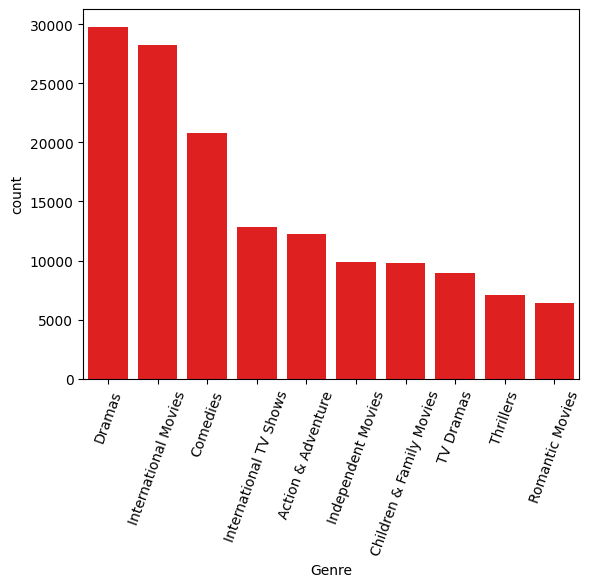

In [ ]:
sns.countplot(data =ott_df, x = 'Genre', order=genre_count.index, color = 'red')
plt.xticks(rotation = 70)
#sns.countplot(data = ott_df,x = 'Director',order = Director_data.index,width = 0.5,color="purple")

#sns.boxplot(data=t3_df,x='Genre',y='Global_Sales',color='orange')
plt.show()

In [ ]:
ott_df.groupby(by=['Type','Country']).Genre.count().reset_index()

,Type,Country,Genre
0,Movie,,98
1,Movie,Afghanistan,2
2,Movie,Albania,8
3,Movie,Algeria,77
4,Movie,Angola,32
...,...,...,...
181,TV Show,United Kingdom,4358
182,TV Show,United States,13449
183,TV Show,Unknown Country,5697
184,TV Show,Uruguay,3


Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

Hint : We want you to get the difference between the columns having date added information and release year information and get the mode of difference. This will give an insight into what will be the better time to add in Netflix

In [ ]:
ott_df["Time_Span"] = ott_df['Date_Added'].dt.year - ott_df['Release_Year']

In [ ]:
ott_df.sort_values(by = "Time_Span",ascending = False).median()

<ipython-input-348-5276afa89301>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ott_df.sort_values(by = "Time_Span",ascending = False).median()
<ipython-input-348-5276afa89301>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ott_df.sort_values(by = "Time_Span",ascending = False).median()


Release_Year    2016.0
Time_Span          2.0
dtype: float64

In [ ]:
#Netflix Started Streaming the content in the Web from 2007
print(ott_df[ott_df['Release_Year']>=2007]["Time_Span"].mean())
print(ott_df[ott_df['Release_Year']>=2007]["Time_Span"].median())
print(ott_df[ott_df['Release_Year']>=2007]["Time_Span"].mode())

2.626583943275389
1.0
0    0
Name: Time_Span, dtype: int64


What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each week and count the total number of movies/ tv shows.

b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each month and
count the total number of movies/ tv shows.

In [ ]:
ott_df[ott_df['Type']=='Movie'].groupby(by=ott_df.Date_Added.dt.week)['Date_Added'].count().sort_values(ascending = False)

<ipython-input-356-f6cba7d21c90>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ott_df[ott_df['Type']=='Movie'].groupby(by=ott_df.Date_Added.dt.week)['Date_Added'].count().sort_values(ascending = False)


Date_Added
1     8456
44    5563
9     5094
35    5048
26    4931
40    4905
31    4388
27    3808
48    3737
18    3686
13    3503
39    3502
30    3262
22    3237
23    3164
5     3148
15    3083
28    2744
7     2636
17    2627
14    2609
36    2586
25    2568
37    2559
43    2521
10    2515
50    2463
33    2418
29    2361
34    2332
16    2323
51    2276
11    2243
49    2181
42    2105
38    2086
3     2031
24    1920
52    1840
20    1829
41    1807
47    1740
6     1649
19    1630
2     1618
21    1606
8     1538
46    1519
12    1431
53    1413
45    1398
32    1233
4     1047
Name: Date_Added, dtype: int64

In [ ]:
#ott_df.drop('Week_Added', axis = 1, inplace = True)
#ott_df.drop('Month_Added', axis = 1, inplace = True)

ott_df['Week_No'] = ott_df.Date_Added.dt.week
ott_df['Month_No'] = ott_df.Date_Added.dt.month

<ipython-input-359-66327f177f37>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ott_df['Week_No'] = ott_df.Date_Added.dt.week


In [ ]:
ott_df

,Show_Id,Type,Title,Date_Added,Release_Year,Rating,Duration,Director,Actor,Country,Genre,Time_Span,Week_No,Month_No
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,Unknown Actor,United States,Documentaries,1,38,9
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,International TV Shows,0,38,9
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Dramas,0,38,9
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Ama Qamata,South Africa,TV Mysteries,0,38,9
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,Unknown Director,Khosi Ngema,South Africa,International TV Shows,0,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,International Movies,4,9,3
202061,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,India,Music & Musicals,4,9,3
202062,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,Dramas,4,9,3
202063,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,India,International Movies,4,9,3


In [ ]:
ott_df.groupby(by=['Week_No','Type'])['Week_No'].count().unstack().reset_index().sort_values(['Movie','TV Show'],ascending = [False, False])

KeyError: 'TV Show'

In [ ]:
ott_df.groupby(by=['Week_No','Type'])['Week_No'].count().unstack().reset_index().sort_values(['TV Show','Movie'],ascending = [False, False])

Type,Week_No,Movie,TV Show
26,27,3808,1977
34,35,5048,1945
23,24,1920,1702
25,26,4931,1662
30,31,4388,1646
12,13,3503,1554
47,48,3737,1513
4,5,3148,1386
43,44,5563,1380
17,18,3686,1364


In [ ]:
ott_df.groupby(by=['Week_No','Type'])['Week_No'].count().unstack().reset_index()[['Week_No','Movie']].sort_values(by = 'Movie',ascending = False)

Type,Week_No,Movie
0,1,8456
43,44,5563
8,9,5094
34,35,5048
25,26,4931
39,40,4905
30,31,4388
26,27,3808
47,48,3737
17,18,3686


In [ ]:
ott_df.groupby(by='Month_No')['Month_No'].count()
ott_df.Month_No.value_counts()

7     20302
12    18266
1     18254
9     18120
10    17796
8     17086
4     17081
6     16659
3     15859
11    15597
5     13827
2     13060
Name: Month_No, dtype: int64